# CAR PRICE ANALYSIS


IMPORT LAIBRARIES

numpy , pandas , matplotlib , seaborn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



Get data set

In [2]:
#load data set
df = pd.read_csv("car_prices.csv")

# show the first row of the data set
df.head()


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


Check Data Structure and missing values

In [3]:
# Chack columns names , data types and null values
df.info()

# check statistics of the data set
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


In [4]:
#check the number of missing values
df.isnull().sum()


year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

Data cleaning

1. Remove duplicate:-


In [5]:
#check the no of duplicate rows
print("Duplicates:",df.duplicated().sum())


Duplicates: 0


2. check missing values and remove them
 

In [6]:
#Fill or remove missing values

#fill missing values with mode value for categorical columns

df['make'].fillna(df['make'].mode()[0], inplace=True)
df['body'].fillna(df['body'].mode()[0], inplace=True)
df['model'].fillna(df['model'].mode()[0], inplace=True)
df['trim'].fillna(df['trim'].mode()[0], inplace=True)
df['transmission'].fillna(df['transmission'].mode()[0], inplace=True)
df['color'].fillna(df['color'].mode()[0], inplace=True)
df['interior'].fillna(df['interior'].mode()[0], inplace=True)

#fill missing values with mean and median value for numerical columns

df['condition'].fillna(df['condition'].median(), inplace=True)
df['odometer'].fillna(df['odometer'].mean(), inplace=True)
df['mmr'].fillna(df['mmr'].mean(), inplace=True)
df['sellingprice'].fillna(df['sellingprice'].mean(), inplace=True)



C:\Users\srija\AppData\Local\Temp\ipykernel_19388\3815224113.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['make'].fillna(df['make'].mode()[0], inplace=True)
C:\Users\srija\AppData\Local\Temp\ipykernel_19388\3815224113.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

4. Standardize columns names


In [7]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')


Final check

In [8]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          558837 non-null  object 
 2   model         558837 non-null  object 
 3   trim          558837 non-null  object 
 4   body          558837 non-null  object 
 5   transmission  558837 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     558837 non-null  float64
 9   odometer      558837 non-null  float64
 10  color         558837 non-null  object 
 11  interior      558837 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558837 non-null  float64
 14  sellingprice  558837 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


📌 Key Analysis & Visualizations for Your Dataset

1. check basic statics


In [9]:
#summary of numerical columns
df.describe()


,year,condition,odometer,mmr,sellingprice
count,558837.000000,558837.000000,558837.000000,558837.000000,558837.000000
mean,2010.038927,30.763899,68320.017767,13769.377495,13611.358810
std,3.966864,13.274944,53394.051633,9679.638057,9749.396951
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,24.000000,28375.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52266.000000,12250.000000,12100.000000
75%,2013.000000,41.000000,99103.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


In [10]:
#count the cars by brand
df['make'].value_counts()


make
Ford          103855
Chevrolet      60197
Nissan         53946
Toyota         39871
Dodge          30710
               ...  
airstream          1
ford tk            1
chev truck         1
hyundai tk         1
Lotus              1
Name: count, Length: 96, dtype: int64

In [23]:
#count the cars by body type
df['body'].value_counts(ascending=True)


body
CTS-V Wagon         1
g37 coupe           1
Ram Van             1
cab plus 4          1
cts wagon           1
                ...  
Hatchback       21380
suv             24552
sedan           41906
SUV            119292
Sedan          212632
Name: count, Length: 87, dtype: int64

2. car price distribution(Histogram)

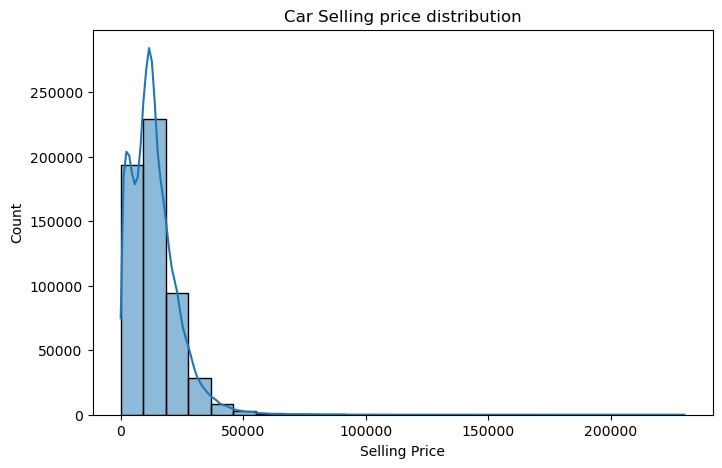

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['sellingprice'],bins=25, kde=True)
plt.title("Car Selling price distribution")
plt.xlabel("Selling Price")
plt.ylabel("Count")

plt.show()


3. Car price vs odometer (scatter plot)

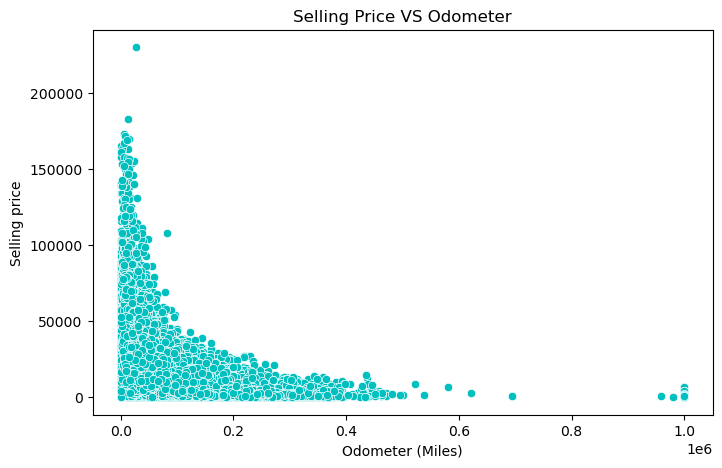

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x = df.odometer ,y = df.sellingprice, color= "c")
plt.title("Selling Price VS Odometer")
plt.xlabel("Odometer (Miles)")
plt.ylabel("Selling price")

plt.show()


4. Average Price by car brand (Bar chart)

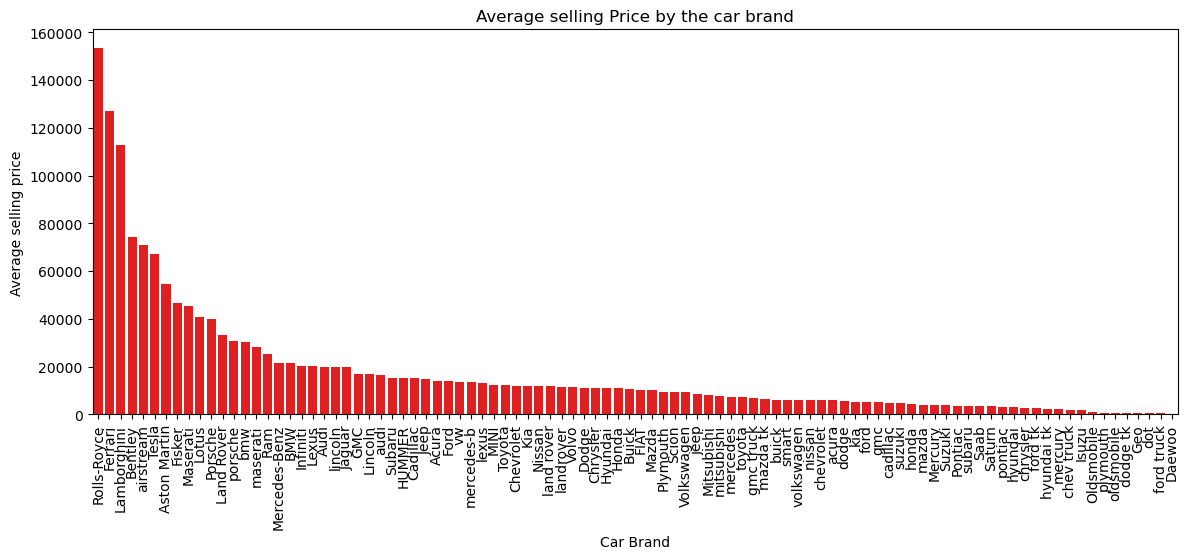

In [ ]:
plt.figure(figsize=(14,5))
Brand_Prices = df.groupby('make')['sellingprice'].mean().sort_values(ascending=False)
sns.barplot( x = Brand_Prices.index, y = Brand_Prices, color="r")
plt.xticks(rotation=90)
plt.title("Average selling Price by the car brand")
plt.xlabel("Car Brand")
plt.ylabel("Average selling price")

plt.show()


5. Price comparison by car conditon (boxplot)

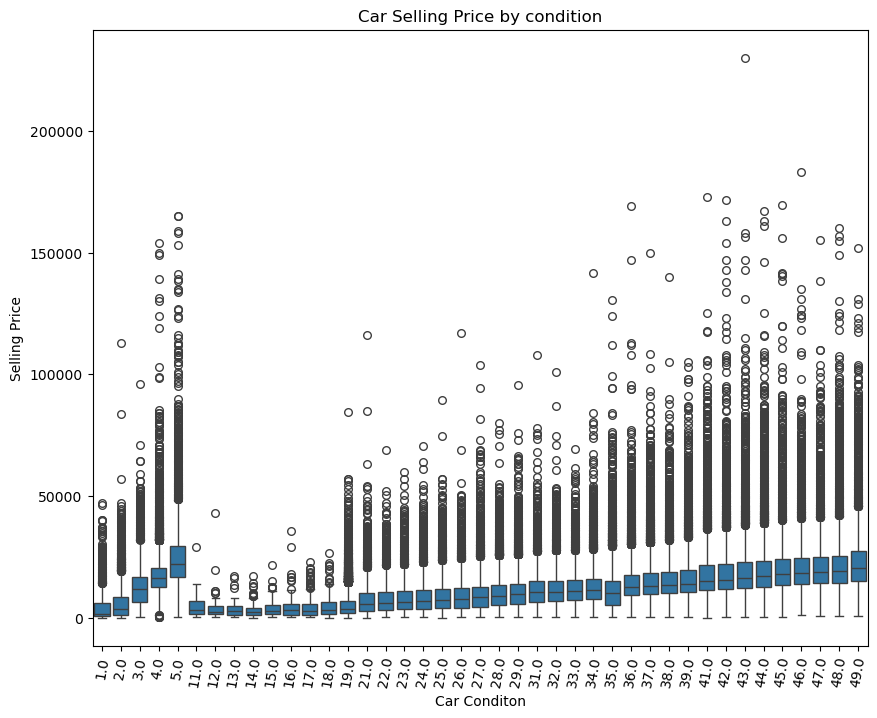

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(x = df.condition , y = df.sellingprice ,fliersize= 5.5)
plt.xticks(rotation = 80)
plt.title("Car Selling Price by condition")
plt.xlabel("Car Conditon")
plt.ylabel("Selling Price")

plt.show()


CONCLUSION AND INSIGHTS DECRIBED IN THE README SECTION
